In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df["bmi"].mean()

28.893236911794673

In [7]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())

In [8]:
#replaced the null values in bmi column with mean

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [12]:
df.drop(["id"],inplace=True,axis=1)

In [13]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
#droping id as it doesnt has any impact on model prediction

EDA

In [14]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

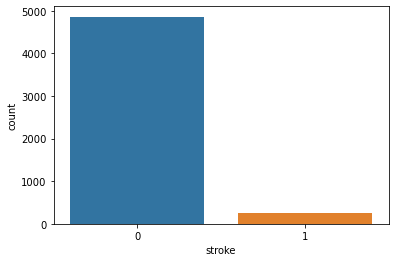

In [15]:
sns.countplot(df["stroke"],data=df)

In [ ]:
#less number of people have suffered from a stroke

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

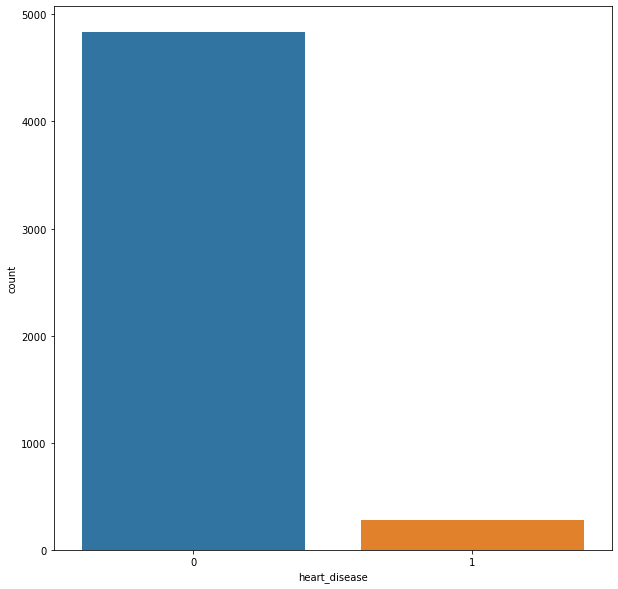

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(df["heart_disease"],data=df)

In [ ]:
#less number of people had heart disease

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

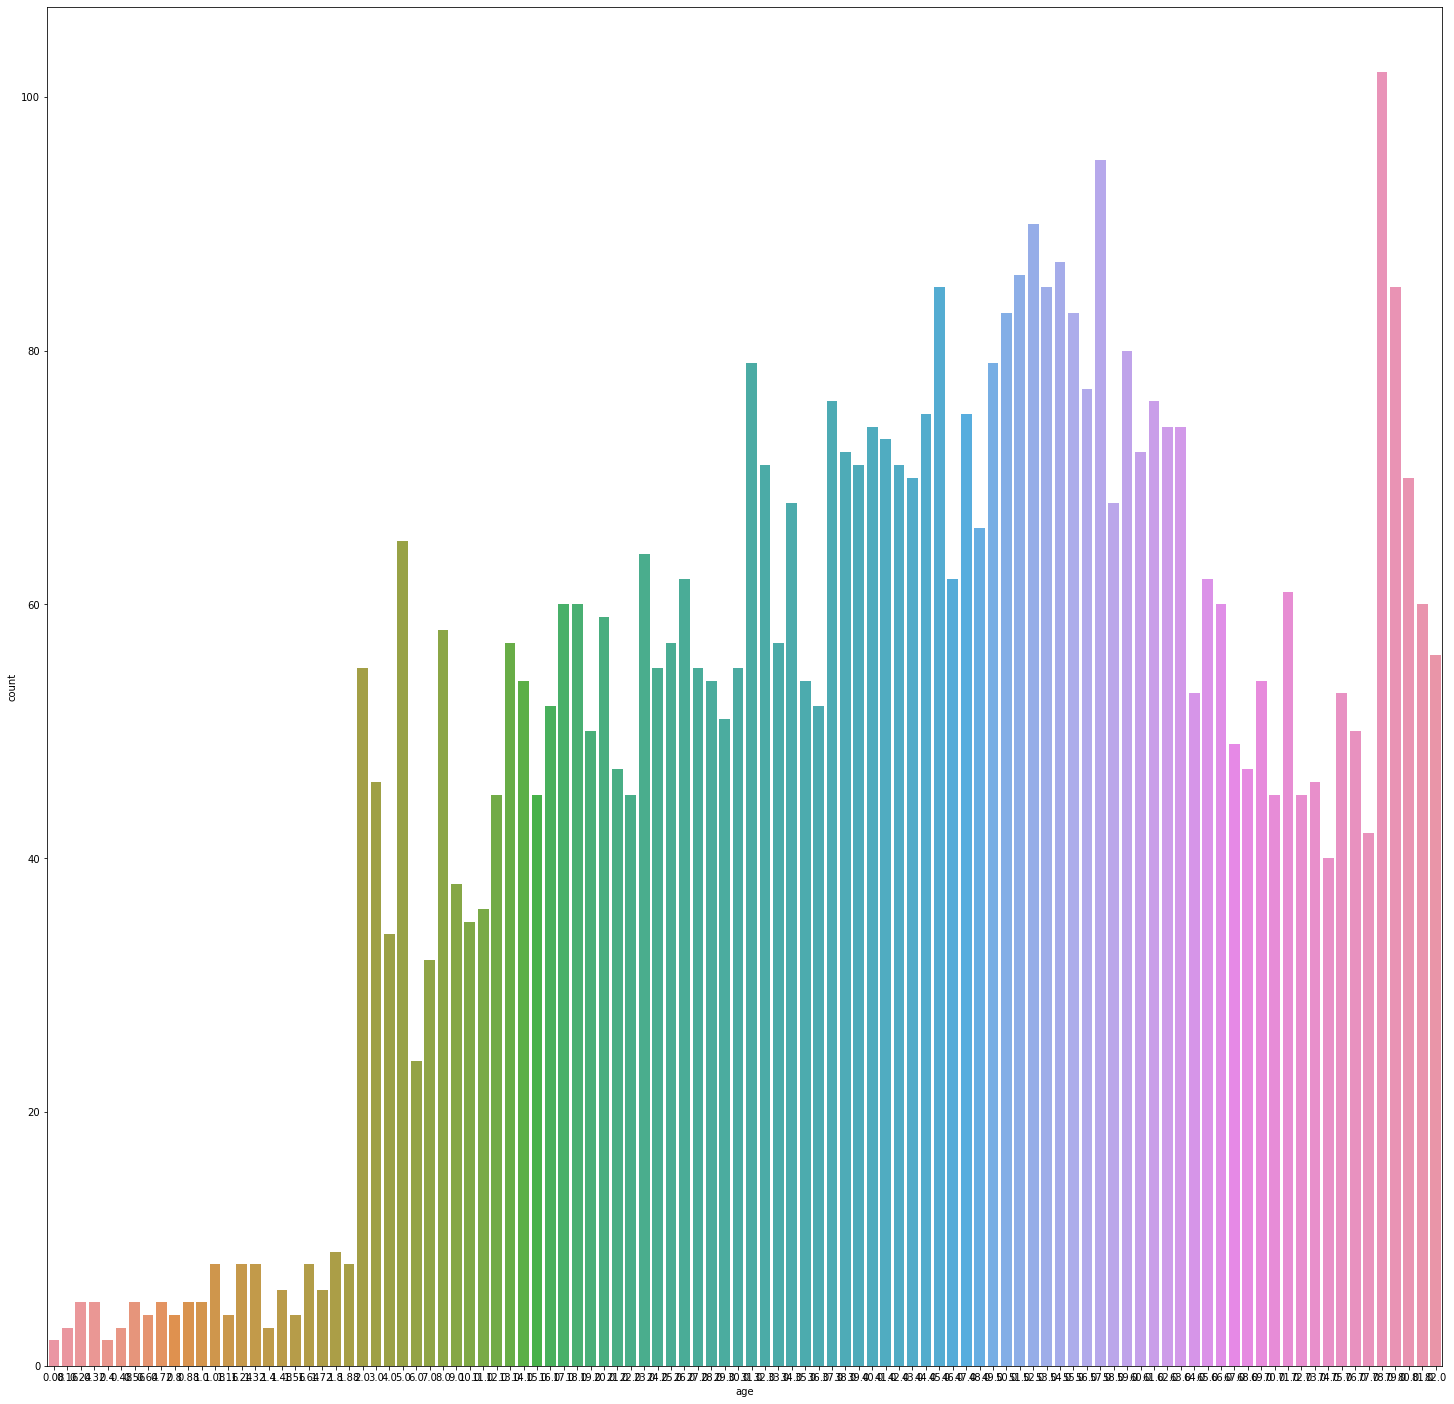

In [20]:
plt.figure(figsize=(25,25))
sns.countplot(df["age"],data=df)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

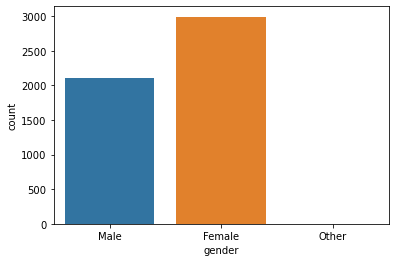

In [21]:
sns.countplot(df["gender"],data=df)

In [ ]:
#there are more number of females than males

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

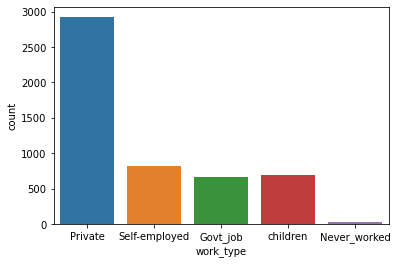

In [22]:
sns.countplot(df["work_type"],data=df)

In [ ]:
# most number of people are working in private sector jobs

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

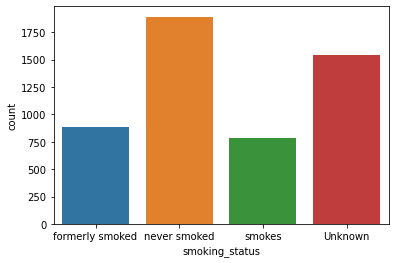

In [23]:
sns.countplot(df["smoking_status"],data=df)

In [ ]:
#most people have never smoked

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

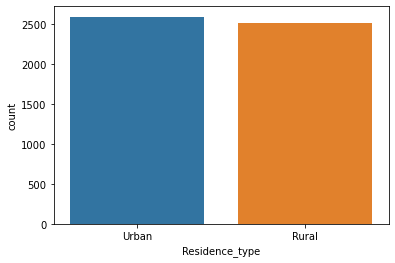

In [24]:
sns.countplot(df["Residence_type"],data=df)

In [ ]:
#almost equal number of people are living in urban anad rural areas

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

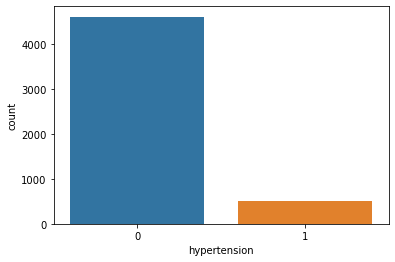

In [25]:
sns.countplot(df["hypertension"],data=df)

In [ ]:
#most number of people didnt had hypertension

<AxesSubplot:xlabel='stroke', ylabel='age'>

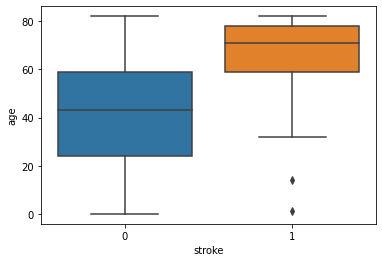

In [26]:
sns.boxplot(x="stroke",y="age",data=df)

In [ ]:
#people below the age of 60 years didnt suffered with stroke but people above the age of 60 years suufered from a stroke

<AxesSubplot:>

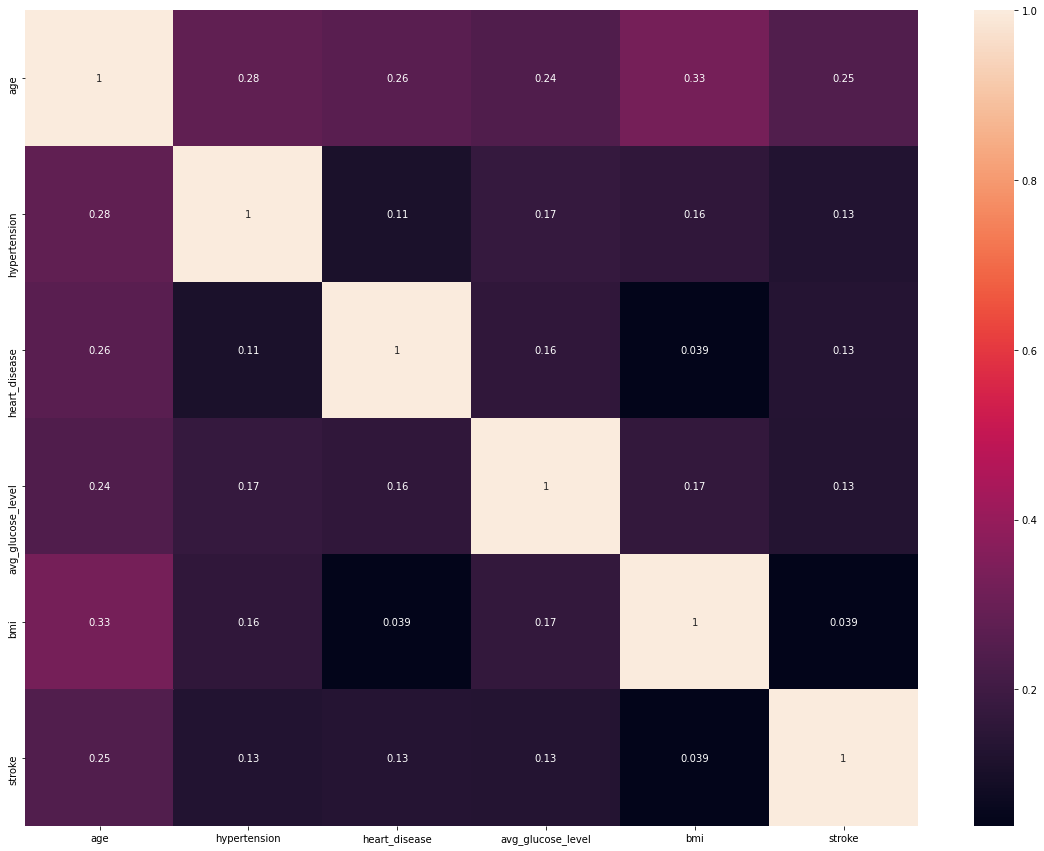

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#correlation 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

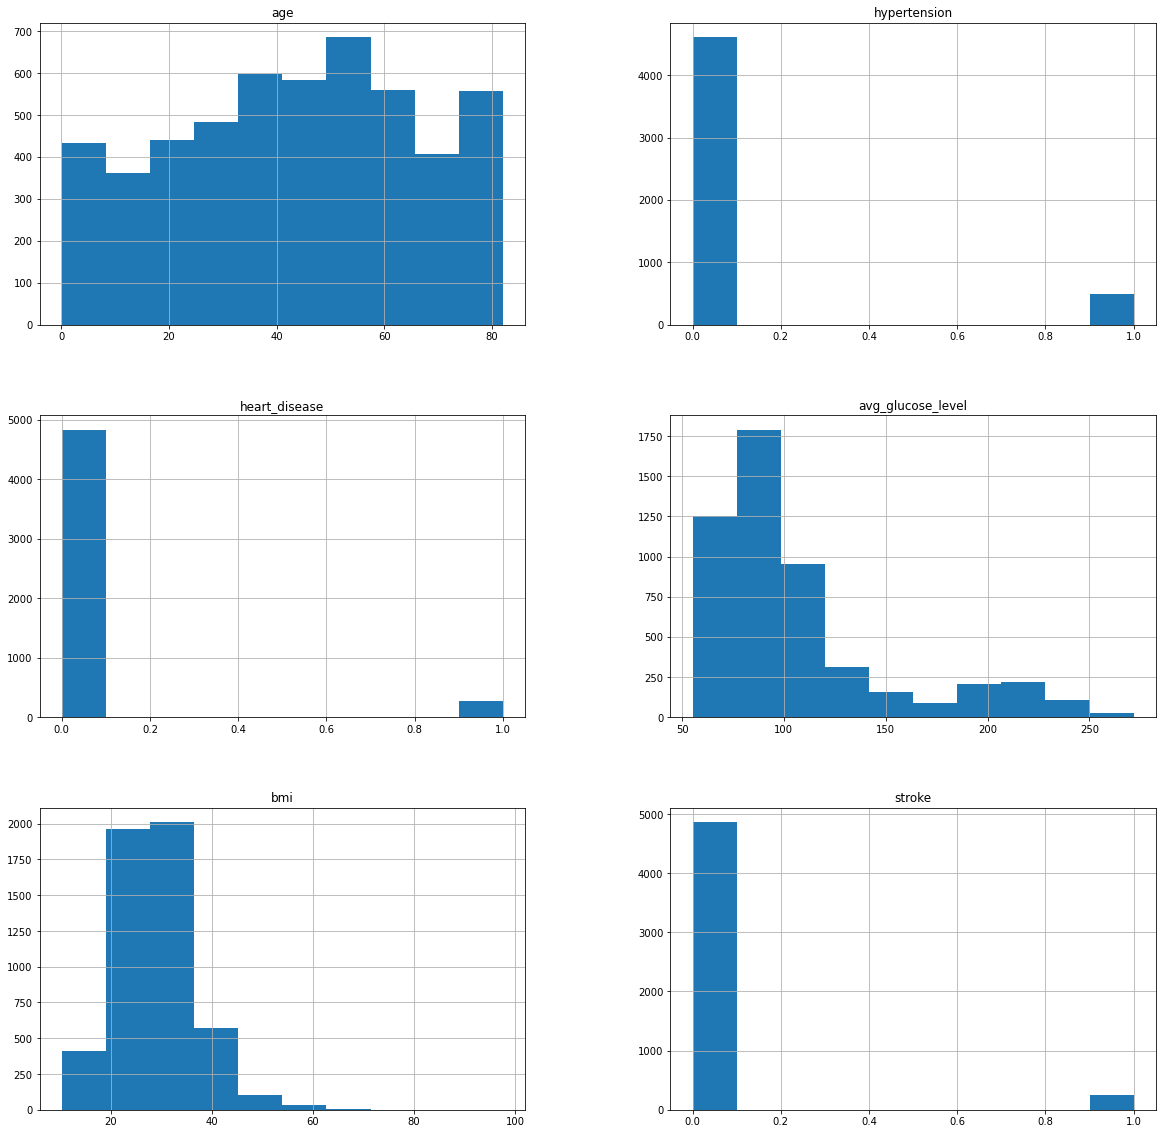

In [28]:
df.hist(figsize=(20,20))

PREPROCESSING

In [29]:
df=pd.get_dummies(df,columns=["gender","ever_married","work_type","Residence_type","smoking_status"])

In [30]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [31]:
x=df.loc[:,df.columns!="stroke"]
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [32]:
y=df["stroke"]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

SPLITING THE DATA

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

FEATURE SCALING

In [35]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

OVER SAMPLING

In [36]:
print("before oversampleing label=1:",sum(ytrain==1))
print("before oversampling label=0:",sum(ytrain==0))

before oversampleing label=1: 189
before oversampling label=0: 3899


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
sm=SMOTE(random_state=2)

In [39]:
xtrain2,ytrain2=sm.fit_resample(xtrain,ytrain.ravel())

In [40]:
print("after oversampleing label=1:",sum(ytrain2==1))
print("after oversampling label=0:",sum(ytrain2==0))

after oversampleing label=1: 3899
after oversampling label=0: 3899


MODEL BUILDING

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

LOGISTIC REGRESSION

In [42]:
lr=LogisticRegression()
lr.fit(xtrain2,ytrain2)

LogisticRegression()

In [43]:
parameters_lr={"C":[0.0006,0.0007,0.0008]}

In [44]:
gr_lr=GridSearchCV(lr,param_grid=parameters_lr,scoring="accuracy",cv=5)

In [45]:
gr_lr.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0006, 0.0007, 0.0008]}, scoring='accuracy')

In [46]:
lr2=gr_lr.best_estimator_
lr2

LogisticRegression(C=0.0008)

In [47]:
pred_lr=lr2.predict(xtrain2)
pred2_lr=lr2.predict(xtest)

In [48]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_lr)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_lr)*100)
print("precision score of train data:",precision_score(ytrain2,pred_lr)*100)
print("precision score of test data:", precision_score(ytest,pred2_lr)*100)
print("recall score of train data:",recall_score(ytrain2,pred_lr)*100)
print("recall score of test data:",recall_score(ytest,pred2_lr)*100)

accuracy score of train data: 76.98127725057708
accuracy score of test data: 72.70058708414872
precision score of train data: 74.37442075996293
precision score of test data: 16.51376146788991
recall score of train data: 82.32880225698898
recall score of test data: 90.0


In [49]:
confusion_matrix(ytrain2,pred_lr)

array([[2793, 1106],
       [ 689, 3210]], dtype=int64)

In [50]:
confusion_matrix(ytest,pred2_lr)

array([[689, 273],
       [  6,  54]], dtype=int64)

DECISION TREE CLASSIFIER

In [51]:
dt=DecisionTreeClassifier()
dt.fit(xtrain2,ytrain2)

DecisionTreeClassifier()

In [52]:
parameters_dt={"max_depth":[3,4,5,6,7,8,9,10]}

In [53]:
gr=GridSearchCV(dt,param_grid=parameters_dt,scoring="accuracy",cv=5)

In [54]:
gr.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [55]:
dt2=gr.best_estimator_

In [56]:
pred_dt=dt2.predict(xtrain2)
pred2_dt=dt2.predict(xtest)

In [57]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_dt)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_dt)*100)
print("precision score of train data:",precision_score(ytrain2,pred_dt)*100)
print("precision score of test data:", precision_score(ytest,pred2_dt)*100)
print("recall score of train data:",recall_score(ytrain2,pred_dt)*100)
print("recall score of test data:",recall_score(ytest,pred2_dt)*100)

accuracy score of train data: 89.52295460374455
accuracy score of test data: 75.63600782778866
precision score of train data: 83.77904427882508
precision score of test data: 14.068441064638785
recall score of train data: 98.02513464991023
recall score of test data: 61.66666666666667


In [58]:
confusion_matrix(ytrain2,pred_dt)

array([[3159,  740],
       [  77, 3822]], dtype=int64)

In [59]:
confusion_matrix(ytest,pred2_dt)

array([[736, 226],
       [ 23,  37]], dtype=int64)

RANDOM FOREST CLASSIFIER

In [60]:
rf=RandomForestClassifier()
rf.fit(xtrain2,ytrain2)

RandomForestClassifier()

In [61]:
parameters_rf={"n_estimators":[100,200,300],"max_depth":[3,4,5,6,7,8,9,10]}

In [62]:
gr_rf=GridSearchCV(rf,param_grid=parameters_rf,scoring="accuracy",cv=5)

In [63]:
gr_rf.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [64]:
rf2=gr_rf.best_estimator_

In [65]:
pred_rf=rf2.predict(xtrain2)
pred2_rf=rf2.predict(xtest)

In [66]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_rf)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_rf)*100)
print("precision score of train data:",precision_score(ytrain2,pred_rf)*100)
print("precision score of test data:", precision_score(ytest,pred2_rf)*100)
print("recall score of train data:",recall_score(ytrain2,pred_rf)*100)
print("recall score of test data:",recall_score(ytest,pred2_rf)*100)

accuracy score of train data: 93.25468068735573
accuracy score of test data: 82.97455968688845
precision score of train data: 90.03085687158794
precision score of test data: 15.66265060240964
recall score of train data: 97.28135419338292
recall score of test data: 43.333333333333336


In [67]:
confusion_matrix(ytrain2,pred_rf)

array([[3479,  420],
       [ 106, 3793]], dtype=int64)

In [68]:
confusion_matrix(ytest,pred2_rf)

array([[822, 140],
       [ 34,  26]], dtype=int64)

KNN

In [69]:
knn=KNeighborsClassifier()
knn.fit(xtrain2,ytrain2)

KNeighborsClassifier()

In [70]:
parameters_knn={"n_neighbors":[5,6,7,8,9,10,11,12,13,14,15]}

In [71]:
gr_knn=GridSearchCV(knn,param_grid=parameters_knn,scoring="accuracy",cv=5)

In [72]:
gr_knn.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15]},
             scoring='accuracy')

In [73]:
knn2=gr_knn.best_estimator_

In [74]:
pred_knn=knn2.predict(xtrain2)
pred2_knn=knn2.predict(xtest)

In [75]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_knn)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_knn)*100)
print("precision score of train data:",precision_score(ytrain2,pred_knn)*100)
print("precision score of test data:", precision_score(ytest,pred2_knn)*100)
print("recall score of train data:",recall_score(ytrain2,pred_knn)*100)
print("recall score of test data:",recall_score(ytest,pred2_knn)*100)

accuracy score of train data: 94.87047961015645
accuracy score of test data: 82.58317025440313
precision score of train data: 91.38869174355335
precision score of test data: 10.135135135135135
recall score of train data: 99.07668632982816
recall score of test data: 25.0


In [76]:
confusion_matrix(ytrain2,pred_knn)

array([[3535,  364],
       [  36, 3863]], dtype=int64)

In [77]:
confusion_matrix(ytest,pred2_knn)

array([[829, 133],
       [ 45,  15]], dtype=int64)

SVC

In [78]:
svc=SVC()
svc.fit(xtrain2,ytrain2)

SVC()

In [79]:
parameters_svc={"kernel":['linear','poly','rbf','sigmoid']}

In [80]:
gr_svc=GridSearchCV(svc,param_grid=parameters_svc,scoring="accuracy",cv=5)

In [81]:
gr_svc.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [82]:
svc2=gr_svc.best_estimator_
svc2

SVC()

In [83]:
pred_svc=svc2.predict(xtrain2)
pred2_svc=svc2.predict(xtest)

In [84]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_svc)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_svc)*100)
print("precision score of train data:",precision_score(ytrain2,pred_svc)*100)
print("precision score of test data:", precision_score(ytest,pred2_svc)*100)
print("recall score of train data:",recall_score(ytrain2,pred_svc)*100)
print("recall score of test data:",recall_score(ytest,pred2_svc)*100)

accuracy score of train data: 89.80507822518594
accuracy score of test data: 79.6477495107632
precision score of train data: 85.92592592592592
precision score of test data: 13.725490196078432
recall score of train data: 95.20389843549628
recall score of test data: 46.666666666666664


In [85]:
confusion_matrix(ytrain2,pred_svc)

array([[3291,  608],
       [ 187, 3712]], dtype=int64)

In [86]:
confusion_matrix(ytest,pred2_svc)

array([[786, 176],
       [ 32,  28]], dtype=int64)

XGBOOST

In [87]:
xg=xgb.XGBClassifier(use_label_encoder=False)
xg.fit(xtrain2,ytrain2)

[17:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [88]:
parameters_xg={"max_depth":[3,4,5,6,7,8,9,10],"n_estimators=100":[100,200,300]}

In [89]:
gr_xg=GridSearchCV(xg,param_grid=parameters_xg,scoring="accuracy",cv=5)

In [90]:
gr_xg.fit(xtrain2,ytrain2)

[17:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[17:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[17:50:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[17:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[17:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[17:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[17:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[17:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[17:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[17:50:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[17:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact',
                                

In [91]:
xg2=gr_xg.best_estimator_
xg2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_estimators=100=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [92]:
pred_xg=xg2.predict(xtrain2)
pred2_xg=xg2.predict(xtest)

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [93]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_xg)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_xg)*100)
print("precision score of train data:",precision_score(ytrain2,pred_xg)*100)
print("precision score of test data:", precision_score(ytest,pred2_xg)*100)
print("recall score of train data:",recall_score(ytrain2,pred_xg)*100)
print("recall score of test data:",recall_score(ytest,pred2_xg)*100)

accuracy score of train data: 99.66658117466018
accuracy score of test data: 91.97651663405088
precision score of train data: 99.89693377995363
precision score of test data: 19.444444444444446
recall score of train data: 99.43575275711721
recall score of test data: 11.666666666666666


In [94]:
confusion_matrix(ytrain2,pred_xg)

array([[3895,    4],
       [  22, 3877]], dtype=int64)

In [95]:
confusion_matrix(ytest,pred2_xg)

array([[933,  29],
       [ 53,   7]], dtype=int64)

COCLUSION:-XGBClassifier and Random Forest classifier are giving the best results